In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [36]:
# Load dataset
data_train  = pd.read_csv("flower_dataset_features.csv")
data_train  = data_train.iloc[:,0:1001]

In [37]:
data_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,class
0,-0.705626,1.639594,0.172473,0.969996,1.642890,1.569268,3.220661,-0.930843,-0.801508,-0.791831,...,-2.080458,-0.836896,-3.084549,-1.443821,-1.061417,-1.024025,-1.334315,-0.435808,3.960737,daisy
1,-0.919001,1.232931,0.085981,0.847642,1.559437,1.509283,3.097852,-0.977383,-0.736290,-0.511645,...,-2.084081,-1.055354,-2.932213,-1.345144,-0.909128,-0.990325,-1.265927,-0.624571,3.888879,daisy
2,-1.271701,1.200205,-0.213998,0.575831,1.145925,0.856601,2.387752,-1.246825,-1.232825,-1.000458,...,-2.456583,-1.268389,-3.221443,-1.661749,-1.422148,-1.275681,-1.748431,-0.771336,3.898668,daisy
3,-0.831656,1.348944,0.080967,0.760328,1.455922,1.421007,3.017863,-0.900549,-0.705898,-0.533548,...,-2.110439,-1.028517,-3.130740,-1.555300,-1.092949,-1.004328,-1.410209,-0.568221,3.876160,daisy
4,-0.682855,1.434426,0.416150,1.064780,1.796767,1.819750,3.463787,-0.854703,-0.482591,-0.456361,...,-1.974737,-0.978553,-2.942863,-1.470003,-1.005337,-0.953264,-1.321891,-0.709360,3.813428,daisy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,-0.788711,1.318606,0.359343,1.028531,1.730650,1.665701,3.299466,-0.762547,-0.508561,-0.471621,...,-2.075481,-1.045255,-2.934833,-1.524112,-1.123691,-1.062733,-1.342577,-0.792613,3.849834,sunflower
4268,-0.701194,1.628309,0.176184,0.900150,1.627900,1.691826,3.266127,-1.000329,-0.685306,-0.742335,...,-2.073668,-0.878486,-3.071159,-1.481170,-0.989276,-0.872868,-1.262147,-0.463600,4.092826,sunflower
4269,-0.836027,1.067055,0.089245,0.910240,1.737288,1.706021,3.138594,-0.795321,-0.420847,-0.291222,...,-1.997577,-1.027216,-2.878318,-1.455801,-0.881730,-0.903243,-1.238593,-0.823124,3.872625,sunflower
4270,-0.502455,1.651924,0.360176,1.156204,1.955855,2.181633,3.797047,-0.705094,-0.290442,-0.625256,...,-1.747128,-0.713329,-2.840251,-1.402702,-0.817473,-0.646354,-1.151632,-0.523780,4.012846,sunflower


In [38]:
x_train     = data_train.iloc[:,0:1000].values
y_train     = data_train.iloc[:,-1:].values
row,coloumn = x_train.shape

In [39]:
y_train

array([['daisy'],
       ['daisy'],
       ['daisy'],
       ...,
       ['sunflower'],
       ['sunflower'],
       ['sunflower']], dtype=object)

In [40]:
# Encoding
# x
for i in range(coloumn):
    x_train[: , i] = LabelEncoder().fit_transform(x_train[:,i])
# y
y_train            = LabelEncoder().fit_transform(y_train)

C:\Python3_7\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
# Normalize X
maxx = []
minn = []
for i in range(coloumn):
    maxx.append(np.max(x_train[:,i]))
    minn.append(np.min(x_train[:,i]))
print(maxx)
print(minn)

[4264.0, 4263.0, 4266.0, 4265.0, 4264.0, 4266.0, 4265.0, 4262.0, 4265.0, 4263.0, 4265.0, 4265.0, 4266.0, 4266.0, 4266.0, 4266.0, 4266.0, 4265.0, 4266.0, 4264.0, 4264.0, 4264.0, 4265.0, 4265.0, 4263.0, 4263.0, 4266.0, 4265.0, 4265.0, 4264.0, 4265.0, 4266.0, 4265.0, 4265.0, 4262.0, 4264.0, 4265.0, 4265.0, 4260.0, 4266.0, 4266.0, 4266.0, 4263.0, 4266.0, 4264.0, 4257.0, 4265.0, 4266.0, 4266.0, 4266.0, 4266.0, 4266.0, 4259.0, 4265.0, 4262.0, 4266.0, 4259.0, 4263.0, 4253.0, 4265.0, 4259.0, 4264.0, 4266.0, 4262.0, 4264.0, 4262.0, 4265.0, 4259.0, 4264.0, 4266.0, 4266.0, 4261.0, 4265.0, 4265.0, 4266.0, 4257.0, 4263.0, 4262.0, 4263.0, 4260.0, 4264.0, 4262.0, 4266.0, 4264.0, 4266.0, 4264.0, 4264.0, 4264.0, 4265.0, 4265.0, 4263.0, 4266.0, 4265.0, 4266.0, 4266.0, 4263.0, 4266.0, 4265.0, 4266.0, 4266.0, 4265.0, 4265.0, 4264.0, 4262.0, 4266.0, 4263.0, 4266.0, 4264.0, 4266.0, 4266.0, 4265.0, 4263.0, 4263.0, 4266.0, 4265.0, 4259.0, 4265.0, 4263.0, 4265.0, 4266.0, 4264.0, 4263.0, 4260.0, 4266.0, 4266.0,

In [42]:
# Normalize X
for i in range(coloumn):  
    for j in range(row):
        x_train[j , i] = (x_train[j , i]- minn[i])/(maxx[i]-minn[i])

In [43]:
x_train

array([[0.81496248, 0.98287591, 0.50046882, ..., 0.61229758, 0.96905041,
        0.57826801],
       [0.36280488, 0.37156932, 0.31340835, ..., 0.75545647, 0.69519343,
        0.41328327],
       [0.01055347, 0.29744312, 0.01851852, ..., 0.01126496, 0.29917937,
        0.43769068],
       ...,
       [0.55722326, 0.08257096, 0.31879981, ..., 0.81389345, 0.2014068 ,
        0.38042713],
       [0.98452158, 0.9849871 , 0.86052508, ..., 0.93311429, 0.8883939 ,
        0.68763201],
       [0.8065197 , 0.16866057, 0.75738397, ..., 0.80262849, 0.03892145,
        0.36141751]])

In [44]:
# Function
def sigmoid(x):
    return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [45]:
#-------------------------------------
#- inisiasi

input       = x_train
target      = y_train
num_input   = 1000
net_hidden1 = 1000
net_hidden2 = 1000
num_output  = 1

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-0.5, high=0.5, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.1
epochs = 200

In [46]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(1000, 1000)
(1000, 1000)
(1000, 1)


In [47]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros(len(target))
    for idx, inp in enumerate(input):
        # A. Feedforward
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        # Menghitung Error
        error           = target[idx] - o_output
        MSE             = MSE + (error*error)
        new_target[idx] = o_output.round()
        # Error hidden2->output
        eh2             = error @ w_output.T
        # Error hidden1->output 
        eh1             = eh2   @ w_hidden2.T
        # B. Backpropagation
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
        
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

KeyboardInterrupt: 

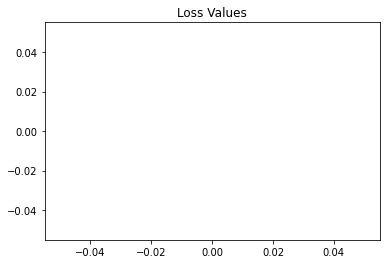

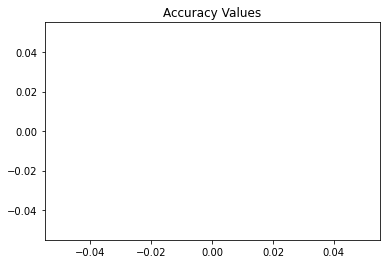

In [48]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()

In [37]:
def predict(data):
    HasilPredict = []
    for i in data:
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(round(float(o_output)))
    return HasilPredict

In [38]:
prediksi = predict([x_train[4]])
print(prediksi)
#e is 0
#p is 1
for i in prediksi :
  if i == 1 :
    print('Result : 1')
  elif i == 0 :
    print('Result : 0')

[0]
Result : 0


In [39]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [40]:
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox


class Test:
    def __init__(self, tk):
        self.var = StringVar()
        self.data = (0, 1)
        self.lb0 = Label(tk,  text = 'MULTILAYER PERCEPTRON PREDIKSI KESELAMATAN PENUMPANG TITANIC',
                         font = ("Times",12)).place(x=15,y=0)
        self.lb1 = Label(tk,  text = 'Sex',font = ("Times",9)).place(x=5,y=50)
        self.lb2 = Label(tk,  text = 'Age',font = ("Times",9)).place(x=5,y=75)
        self.lb3 = Label(tk,  text = 'SibSp',font = ("Times",9)).place(x=5,y=100)
        self.lb4 = Label(tk,  text = 'Parch',font = ("Times",9)).place(x=5,y=125)
        self.lb5 = Label(tk,  text = 'Fare',font = ("Times",9)).place(x=5,y=150)
        self.lb6 = Label(tk,  text = 'Embarked',font = ("Times",9)).place(x=5,y=175)
        #---------------------------------------------------------------------------------------------
        self.cb1 = Combobox(tk, values=self.data,font = ("Times",9), width=17)
        self.cb1.place(x=80, y=50)
        self.e2  = Entry(tk,font = ("Times",9) )
        self.e2.place(x=80,y=75)
        self.e3  = Entry(tk,font = ("Times",9) )
        self.e3.place(x=80,y=100)
        self.e4  = Entry(tk,font = ("Times",9) )
        self.e4.place(x=80,y=125)
        self.e5  = Entry(tk,font = ("Times",9) )
        self.e5.place(x=80,y=150)
        self.e6  = Entry(tk,font = ("Times",9) )
        self.e6.place(x=80,y=175)
        #---------------------------------------------------------------------------------------------
        self.b1  = Button(tk, text="Prediksi",font = ("Times",9), command=self.select).place(x=300, y=250, anchor=CENTER)
        self.lb7 = Label(tk,  text = 'Hasil', font = ("Times",9))
        self.lb7.place(x=300, y=300, anchor=CENTER)
        
    def select(self):
        data   = []
        value1 = (float(self.cb1.get())-minn[0])/(maxx[0]-minn[0])
        #messagebox.showinfo("Warn", "You selected " + value)
        value2 = (float(self.e2.get())-minn[1])/(maxx[1]-minn[1])
        value3 = (float(self.e3.get())-minn[2])/(maxx[2]-minn[2])
        value4 = (float(self.e4.get())-minn[3])/(maxx[3]-minn[3])
        value5 = (float(self.e5.get())-minn[4])/(maxx[4]-minn[4])
        value6 = (float(self.e6.get())-minn[5])/(maxx[5]-minn[5])
        data.append(value1)
        data.append(value2)
        data.append(value3)
        data.append(value4)
        data.append(value5)
        data.append(value6)
        HasilPredict = []
        print(data)
        for i in data:
            # Hidden Layer1
            o_hidden1 = np.matmul(data, w_hidden1) + b_hidden1
            o_hidden1 = sig(o_hidden1)
            # Hidden Layer2
            o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
            o_hidden2 = sig(o_hidden2)
            # Outpur Layer
            o_output  = np.matmul(o_hidden2, w_output) + b_output
            o_output  = sig(o_output)
            HasilPredict.append(round(float(o_output)))
        for i in HasilPredict:
            if i == 1 :
                a = 'Selamat'
            elif i == 0 :
                a = 'Tewas'
        self.lb7.config(text=a)
tk = Tk()
tk.geometry("600x350")
tk.title("MULTILAYER PERCEPTRON")
tt = Test(tk)
tk.mainloop()

[1.0, 0.7613636363636364, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.7613636363636364, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.6666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.8333333333333334, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.97165991902834, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.6072874493927125, 1.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.6072874493927125, 0.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.46558704453441296, 0.0]
[0.0, 0.5681818181818182, 0.16666666666666666, 0.6666666666666666, 0.708502024291498, 0.0]
[0.0, 0.3409090909090909, 0.16666666666666666, 0.6666666666666666, 0.708502024291498, 0.0]
[0.0, 0.5227272727272727, 0.16666666666666666, 0.0, 0.708502024291498, 0.0]
[0.0, 0.5227272727

C:\Python3_7\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[0.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.008097165991902834, 10.666666666666666]
[1.0, 0.3409090909090909, 0.0, 0.6666666666666666, 0.00809716599190283